In [1]:
import matplotlib.pyplot as plt
import uproot
#test
df = uproot.open('B2JpsiK0s.root:tree').arrays(['Mbc','isSignal'], library='pd')

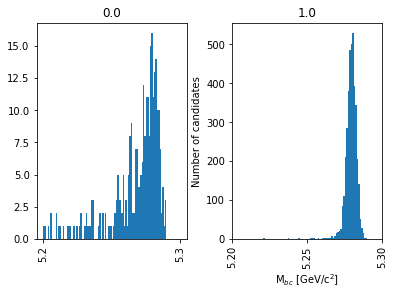

In [2]:
# df.query("isSignal==1").hist('Mbc', bins=100, range=(4.3, 5.3))
# df.query("isSignal==0").hist('Mbc', bins=100, range=(4.3, 5.3))
df.hist('Mbc', bins=100, range=(5.2, 5.3), by='isSignal')
plt.xlabel(r'M$_{bc}$ [GeV/c$^{2}$]')
plt.ylabel('Number of candidates')
plt.xlim(5.2, 5.3)
plt.style.use("belle2")
plt.savefig('Mbc_all.png')